In [1]:
import time
import itertools
import math
import datetime
import pynmea2
import serial
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '../../DATA/EXP1/IOT/logfile.txt'

In [3]:
def read2df(filename):
    iot_data = {'time':[], 'latitude':[], 'latitude direction':[], 'longitude':[], 'longitude direction':[], 'quality':[], 'in use':[],'PRN in use':[], 'antenna alt':[], #GGA
            # GLL
            'PDOP':[], 'HDOP':[], 'VDOP':[], #GSA
            #RMC
            'speed kmh':[], #VTG
            'date':[] #ZDA
            }

    sat_data = { 'time':[], #GGA
            'PRN':[], #GSA
            'elevation':[], 'azimuth':[], 'SNR':[] # GSV
            }
    
    iot_df = pd.DataFrame(iot_data)
    sat_df = pd.DataFrame(sat_data)
    
    iot_df['latitude direction'] = iot_df['latitude direction'].astype('str')
    iot_df['longitude direction'] = iot_df['longitude direction'].astype('str')
    iot_df['date'] = iot_df['date'].astype('str')
    iot_df['PRN in use'] = iot_df['PRN in use'].astype(object)
    

    f = open(filename)
    reader = pynmea2.NMEAStreamReader(f)

    #time - update on the go
    i=0
    while 1:
        try:
            for msg in reader.next():

                msg_type = msg.sentence_type

                if msg_type == 'GGA':
                    time = msg.timestamp
                    if time not in iot_df['time'].values:
                        iot_df = iot_df.append({'time':time}, ignore_index=True)
                    iot_time_idx = iot_df[iot_df['time'] == time].index.values.astype(int)[0]

                    iot_df.at[iot_time_idx, 'latitude']=msg.lat
                    iot_df.at[iot_time_idx, 'latitude direction']=msg.lat_dir
                    iot_df.at[iot_time_idx, 'longitude']=msg.lon
                    iot_df.at[iot_time_idx, 'longitude direction']=msg.lon_dir
                    iot_df.at[iot_time_idx, 'quality']=msg.gps_qual
                    iot_df.at[iot_time_idx, 'in use']=msg.num_sats
                    iot_df.at[iot_time_idx, 'antenna alt']=msg.altitude


                elif msg_type == 'GLL':
                    pass
                    #print('gll')
                elif msg_type == 'GSA':
                    iot_df.at[iot_time_idx, 'PDOP']=msg.pdop
                    iot_df.at[iot_time_idx, 'HDOP']=msg.hdop
                    iot_df.at[iot_time_idx, 'VDOP']=msg.vdop

                    sat_list = []

                    if(msg.sv_id01):
                        sat_list.append(int(msg.sv_id01))
                    if(msg.sv_id02):
                        sat_list.append(int(msg.sv_id02))
                    if(msg.sv_id03):
                        sat_list.append(int(msg.sv_id03))
                    if(msg.sv_id04):
                        sat_list.append(int(msg.sv_id04))
                    if(msg.sv_id05):
                        sat_list.append(int(msg.sv_id05))
                    if(msg.sv_id06):
                        sat_list.append(int(msg.sv_id06))
                    if(msg.sv_id07):
                        sat_list.append(int(msg.sv_id07))
                    if(msg.sv_id08):
                        sat_list.append(int(msg.sv_id08))
                    if(msg.sv_id09):
                        sat_list.append(int(msg.sv_id09))
                    if(msg.sv_id10):
                        sat_list.append(int(msg.sv_id10))
                    if(msg.sv_id11):
                        sat_list.append(int(msg.sv_id11))
                    if(msg.sv_id12):
                        sat_list.append(int(msg.sv_id12))

                    iot_df.at[iot_time_idx, 'PRN in use'] = sat_list


                elif msg_type == 'GSV':

                    if msg.sv_prn_num_1:
                        sat_df = sat_df.append({'time':time, 'PRN': msg.sv_prn_num_1, 'elevation':msg.elevation_deg_1, 'azimuth':msg.azimuth_1, 'SNR':msg.snr_1}, ignore_index=True)
                    if msg.sv_prn_num_2:
                        sat_df = sat_df.append({'time':time, 'PRN': msg.sv_prn_num_2, 'elevation':msg.elevation_deg_2, 'azimuth':msg.azimuth_2, 'SNR':msg.snr_2}, ignore_index=True)
                    if msg.sv_prn_num_3:
                        sat_df = sat_df.append({'time':time, 'PRN': msg.sv_prn_num_3, 'elevation':msg.elevation_deg_3, 'azimuth':msg.azimuth_3, 'SNR':msg.snr_3}, ignore_index=True)
                    if msg.sv_prn_num_4:
                        sat_df = sat_df.append({'time':time, 'PRN': msg.sv_prn_num_4, 'elevation':msg.elevation_deg_4, 'azimuth':msg.azimuth_4, 'SNR':msg.snr_4}, ignore_index=True)

                    pass
                    #print('gsv')
                elif msg_type == 'RMC':
                    pass
                    #print('rmc')
                elif msg_type == 'VTG':
                    iot_df.at[iot_time_idx, 'speed kmh']=msg.spd_over_grnd_kmph
                    #print('vtg')
                elif msg_type == 'ZDA':
                    time = msg.timestamp
                    if time not in iot_df['time'].values:
                        iot_df = iot_df.append({'time':time}, ignore_index=True)
                    iot_time_idx = iot_df[iot_df['time'] == time].index.values.astype(int)[0]

                    iot_df.at[iot_time_idx, 'date']=str(msg.day)+'/'+str(msg.month)+'/'+str(msg.year)
                    #print('zda')
                elif msg_type == 'TXT':
                    pass
                    #print('txt')
                else:
                    pass
                    #print(msg_type)

            i += 1
        except:
            break
    f.close()

    iot_df = iot_df.set_index('time')
    sat_df = sat_df.set_index('time','PRN')
    return iot_df, sat_df

In [4]:
iot_df, sat_df = read2df(file_path)

In [5]:
sat_df.reset_index(inplace=True)
sat_df.head()

,time,PRN,elevation,azimuth,SNR
0,18:19:33,02,12,143,
1,18:19:33,05,37,104,19
2,18:19:33,12,56,083,20
3,18:19:33,21,31,300,26
4,18:19:33,24,25,360,18


In [6]:
sat_df.set_index(['time', 'PRN'], inplace = True)
sat_df.sort_index(inplace = True)

In [64]:
sat_df.loc[sat_df.index.get_level_values('PRN') == '32'].tail()

,,elevation,azimuth,SNR
time,PRN,,,
18:24:35,32,,,23
18:24:36,32,,,23
18:24:37,32,,,23


In [30]:
sats_view = []
for item in sat_df.index.get_level_values('PRN'):
    if item not in sats_view:
        sats_view.append(item)
sats_view.sort()
print(sats_view)

['02', '03', '05', '08', '10', '12', '15', '16', '20', '21', '24', '25', '26', '29', '31', '32', '33', '34', '35']


In [39]:
num_plot = math.ceil(math.sqrt(len(sats_view)))

In [40]:
x = list(i for i in range(num_plot) for _ in range(num_plot))
y = list(range(num_plot))*num_plot
list(zip(x, y, sats_view))

[(0, 0, '02'),
 (0, 1, '03'),
 (0, 2, '05'),
 (0, 3, '08'),
 (0, 4, '10'),
 (1, 0, '12'),
 (1, 1, '15'),
 (1, 2, '16'),
 (1, 3, '20'),
 (1, 4, '21'),
 (2, 0, '24'),
 (2, 1, '25'),
 (2, 2, '26'),
 (2, 3, '29'),
 (2, 4, '31'),
 (3, 0, '32'),
 (3, 1, '33'),
 (3, 2, '34'),
 (3, 3, '35')]

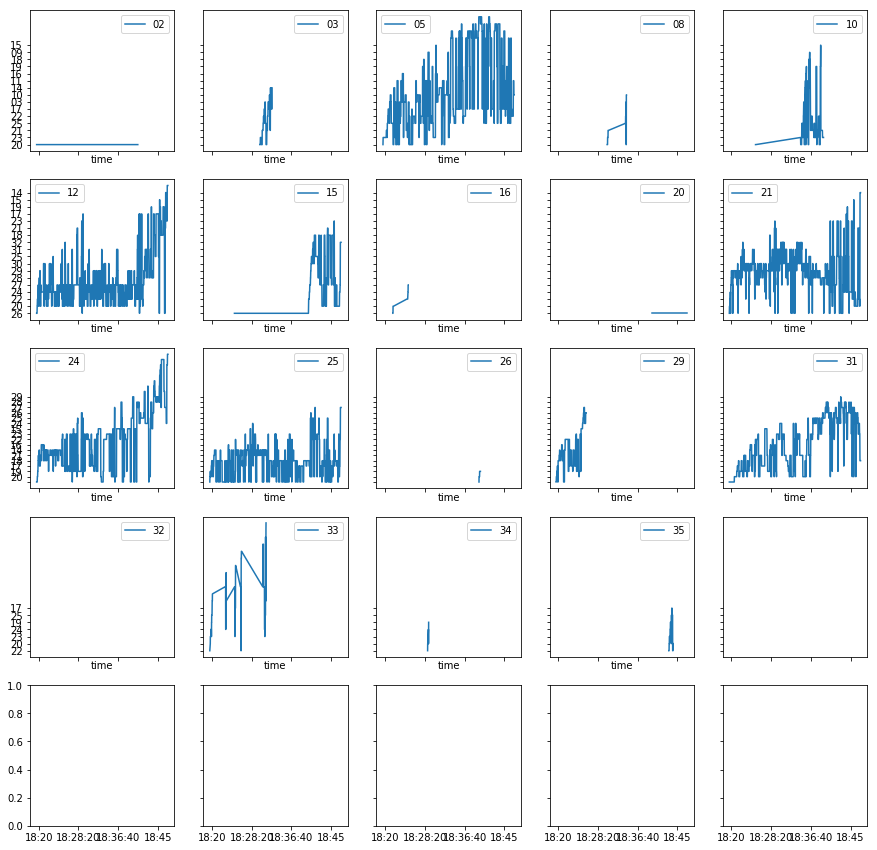

In [81]:
fig, axs = plt.subplots(num_plot, num_plot, sharex = 'col', sharey = 'row', figsize=(15, 15))

for (i, j, sats) in list(zip(x, y, sats_view)):
    axs[i, j].plot(sat_df.loc[sat_df.index.get_level_values('PRN') == sats].index.get_level_values('time'), 
                   sat_df.loc[sat_df.index.get_level_values('PRN') == sats]['SNR'])
    axs[i, j].legend([''.join(list(sats))])
    #axs[i, j].set_ylim(0, 30)

plt.show()